## LAB | EDA BIVARIATE

In [64]:
#pip show kagglehub

## Loading & Preparing the data

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency 
from scipy.stats.contingency import association 

import kagglehub
from kagglehub import KaggleDatasetAdapter

import statsmodels.api as sm

%matplotlib inline 
pd.set_option("display.max_columns", None)

In [66]:
# Set the path to the file
file_path = "amz_uk_price_prediction_dataset.csv"

# Load the latest version

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/uk-optimal-product-price-prediction",
  file_path,
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/rx/4vz0nngn7_q84td2symm90y40000gn/T/ipykernel_25196/3013975043.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [18]:
df.shape

(2443651, 9)

In [19]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    - Are there categories where being a best-seller is more prevalent? 
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [15]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

Crosstab Analysis

In [22]:
df_best_sellers = pd.crosstab(df["category"], df["isBestSeller"]).sort_values(by=True, ascending=False)
df_best_sellers

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


### Statistical Test

In [24]:
# P-value for Chi-square 
_, chi_p, _, _ = chi2_contingency(df_best_sellers)
print(f"P-value of Chi-square test is: {chi_p}")

# Cramer's V
association(df_best_sellers, method="cramer")

P-value of Chi-square test is: 0.0


0.12228294397605641

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

### Visualization 

In [43]:
df_best_sellers.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

In [45]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


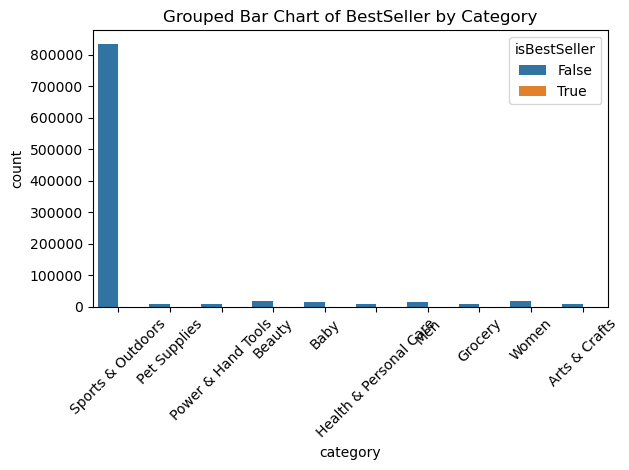

In [47]:
# Step 1: Filter for BestSellers only 
df_best = df[df["isBestSeller"] == True]

# Step 2: Count BestSellers per category
top_categories = df_best["category"].value_counts().nlargest(10).index

# Step 3: Filter full DataFrame to include only those top categories
df_top10 = df[df["category"].isin(top_categories)]

sns.countplot(data=df_top10, x="category", hue="isBestSeller")
plt.xticks(rotation=45)
plt.title("Grouped Bar Chart of BestSeller by Category")
plt.tight_layout()
plt.show()

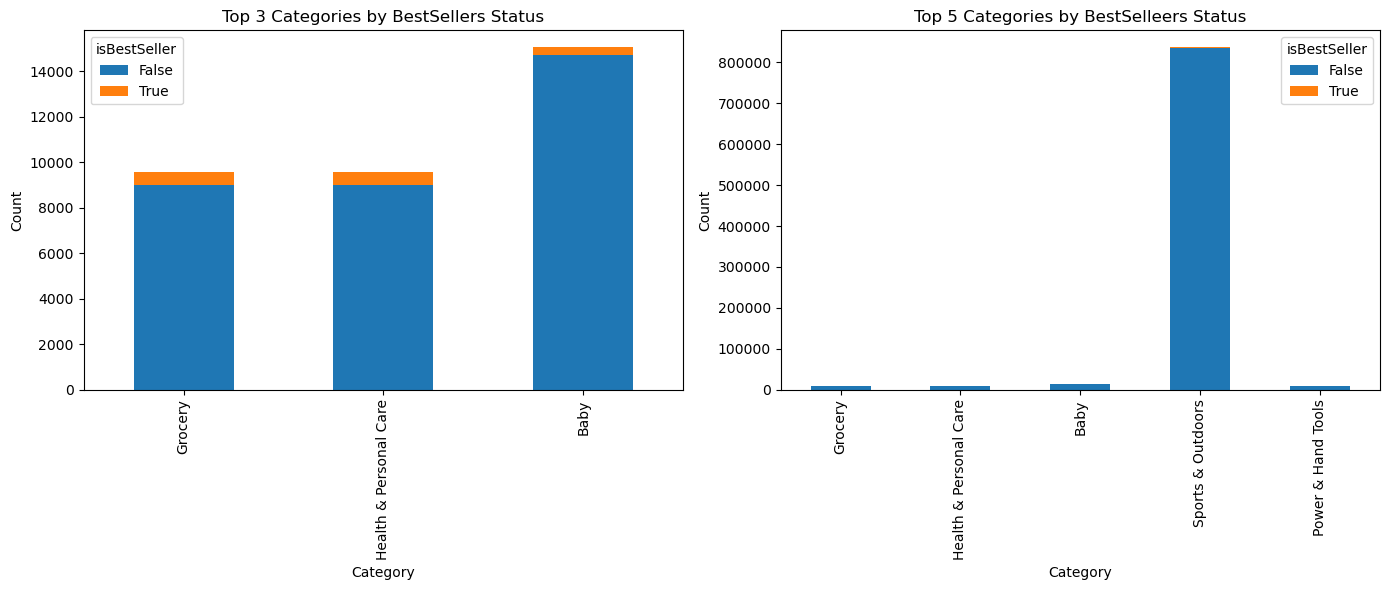

In [33]:
# Create two subplot side by side 
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # so 1 row, 2 columns 

# Plot 1: Top 3 BestSellers
df_best_sellers.head(3).plot(
    kind="bar",
    stacked=True,
    ax=axes[0]
)

axes[0].set_title("Top 3 Categories by BestSellers Status")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend(title="isBestSeller")

# Plot 2: Top 5 for visible outcome on stacked barplot
df_best_sellers.head(5).plot(
    kind="bar", 
    stacked=True,
    ax=axes[1])

axes[1].set_title("Top 5 Categories by BestSelleers Status")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90) # rotate x-axis labels for readability
axes[1].legend(title="isBestSeller")

plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()

In [16]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [17]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

### Exploring Product Prices and Ratings Across Categories and Brands
Preliminary Step: Remove Outliers in Product Prices

In [49]:
# IQR Method 
# Defining 1st and 3rd quantiles 

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3-Q1

# Defining upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df["price"] <= upper_bound) & (df["price"] >= lower_bound)]

### Violin Plots 

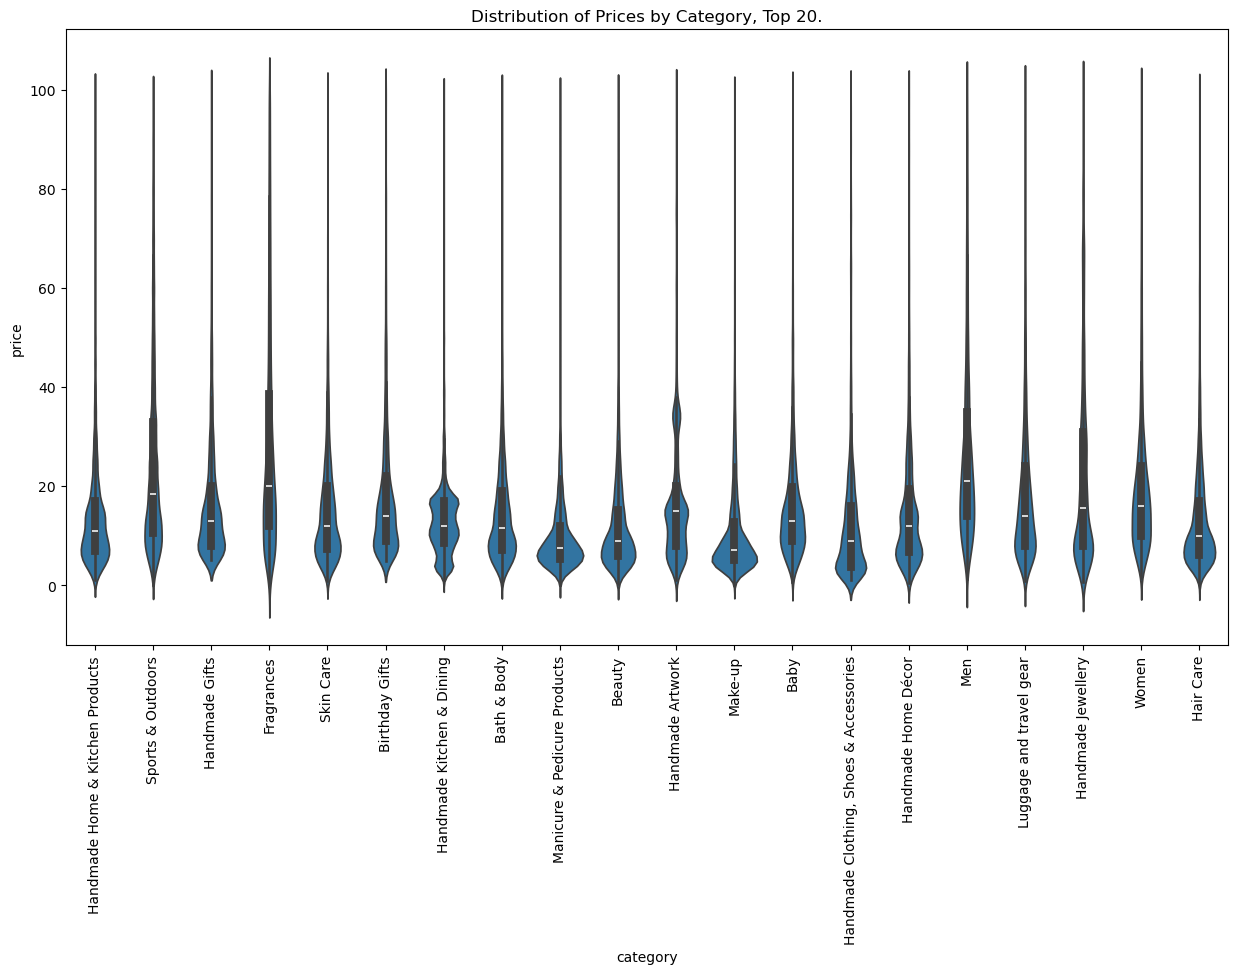

'Desktop PCs'

In [53]:
# Identifying the top 20 categories by count of price entries 
top_categories = df["category"].value_counts().head(20).index

# Filter the DataFrame to only include the rows from these top categories 
filtered_df = df[df["category"].isin(top_categories)]

# Creating the violin plot 
plt.figure(figsize=(15,8))
sns.violinplot(data=filtered_df, x="category", y="price")
plt.xticks(rotation=90)
plt.title("Distribution of Prices by Category, Top 20.")
plt.show()

# Category with highest median price
df.groupby("category")["price"].median().idxmax()

### Bar Charts 

category
Bath & Body                               14.68
Beauty                                    12.52
Birthday Gifts                            18.60
Hair Care                                 13.46
Handmade Clothing, Shoes & Accessories    12.96
Handmade Gifts                            17.40
Make-up                                   10.61
Manicure & Pedicure Products              10.23
Skin Care                                 15.65
Sports & Outdoors                         25.17
Name: price, dtype: float64


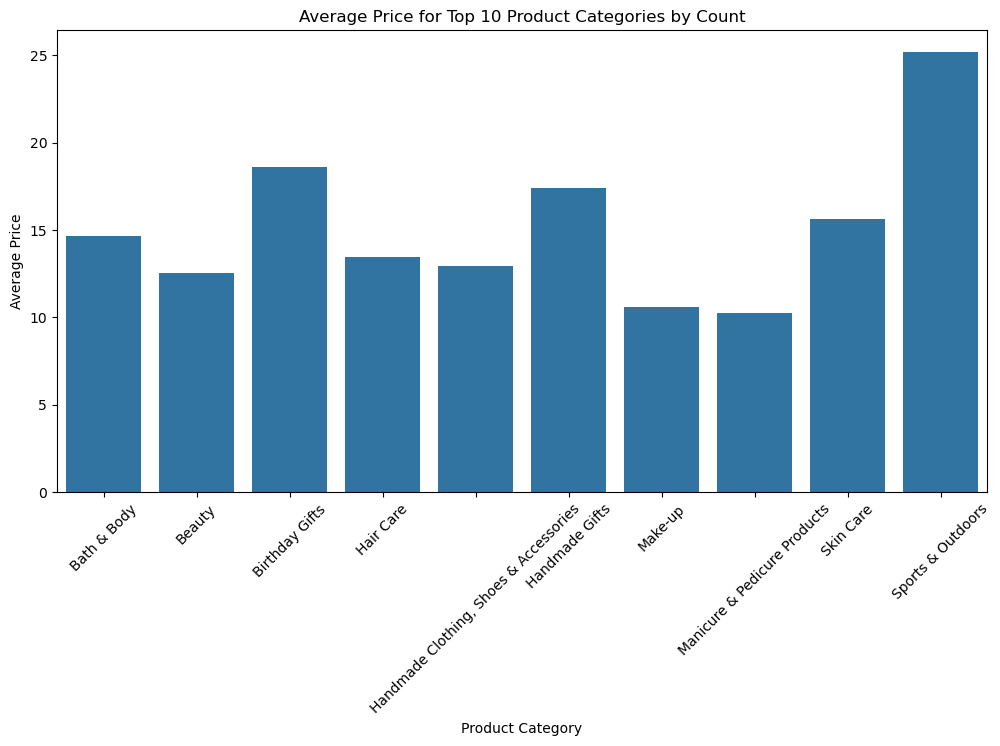

'Motherboards'

In [56]:
# Top 10 categories based on count 
top_categories = df["category"].value_counts().head(10).index
filtered_df1 = df[df["category"].isin(top_categories)]

# Group by category and calculate the average price for these top categories 
avg_top_prices = filtered_df1.groupby("category")["price"].mean().round(2)

print(avg_top_prices)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_top_prices.index, y=avg_top_prices.values)
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price for Top 10 Product Categories by Count")
plt.show()

# Category with the highest average price
df.groupby("category")["price"].mean().idxmax()

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

 ### Investigating the Interplay Between Product Prices and Ratings

In [ ]:
# Pearson 
pearson = df["price"].corr(df["stars"])

# Spearman 
spearman = df["price"].corr(df["stars"], method="spearman")

print(pearson)
print(spearman)

-0.07767299878181352
-0.06679697280768393


### Visualisations

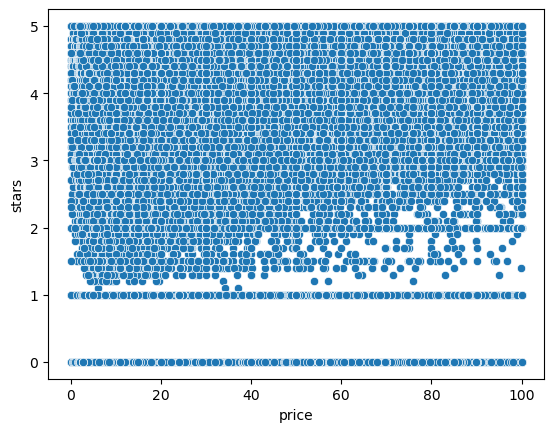

In [59]:
# Scatter plot
sns.scatterplot(data=df, x="price", y="stars")
plt.show()

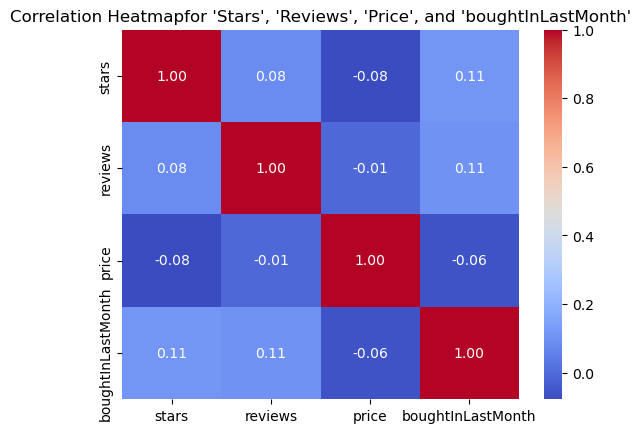

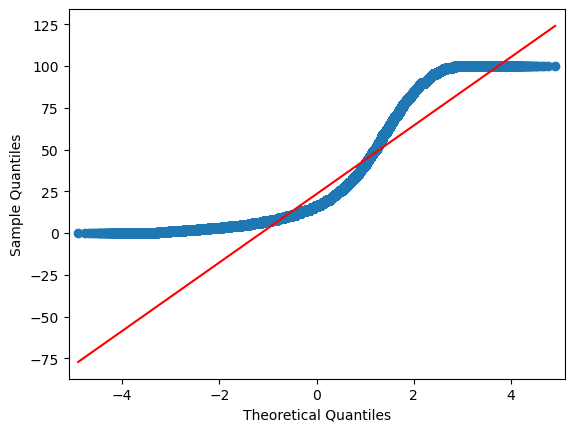

In [63]:
nums = df[["stars", "reviews", "price", "boughtInLastMonth"]].corr()

# Heatmap plot 

sns.heatmap(nums, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmapfor 'Stars', 'Reviews', 'Price', and 'boughtInLastMonth'")
plt.show()

# Generating a Q-Q Plot for Price to check if the distribution is normal
sm.qqplot(df['price'], line='s');
plt.show()

The scatter plot reveals a gap in ratings between 0 and 1, indicating that such values are not present in the dataset. It also suggests a subtle trend where higher-priced products receive fewer low ratings.init